# Лабораторная работа №5. "ДРЕВОВИДНЫЕ МОДЕЛИ: РЕШАЮЩИЕ ДЕРЕВЬЯ И ИХ КОМПОЗИЦИИ"

**Задание №1.**\
A). Реализовать DecisionTreeClassifier и DecisionTreeRegressor из Sclearn для соответствующих наборов данных своего варианта. Осуществить настройку гиперпараметров. Выполнить оценку качества модели, визуализировать дерево решений, вывести решающие правила. Сравнить полученные результаты обучения моделей с данными, полученными с помощью PyCaret (открытая low-code библиотека ML на Python, см. Lab5_Ex3 DRs_classifier.ipynb) \
B). Реализовать обучение и вычисление дерева с использованием алгоритма CART для задачи регрессии и задачи классификации. Выполнить оценку качества моделей, визуализировать дерево решений, вывести решающие правила.

**Задание №2.** Применить ансамбли для наборов данных своего варианта:
- BaggingClassifier
- BaggingRegressor

- GradientBoostingClassifier
- GradientBoostingRegressor

- StackingClassifier
- StackingRegressor

Выполнить оценку качества моделей и выбрать лучшую модель.

**Задание №3.** Реализовать для решения задачи регрессии и задачи классификации следующие библиотеки:
- Catboost,
- XGBoost,
- LightGBM

Выполнить оценку качества моделей и выбрать лучшую модель.

**Доп. задание:** реализовать любой из понравившихс мета алгоритмов (бэггинг, бустинг, стэкинг)

# Задание 1

In [103]:
import pandas as pd
import numpy as np

## Decision Tree Classifier

In [6]:
df_clf=pd.read_csv("C:/Users/seito/Jupyter Notebook/data/dataset4_with_EDA")
df_clf

,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60596,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
60597,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
60598,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
60599,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


In [7]:
from sklearn.model_selection import train_test_split

y_clf = df_clf['Fire Alarm']
X_clf = df_clf.drop(['Fire Alarm'], axis=1)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=0)

X_train_clf.shape, y_train_clf.shape, X_test_clf.shape, y_test_clf.shape

((48480, 12), (48480,), (12121, 12), (12121,))

In [30]:
X_train_clf.columns

Index(['Temperature', 'Humidity', 'TVOC', 'eCO2', 'Raw H2', 'Raw Ethanol',
       'Pressure', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5'],
      dtype='object')

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

tree_param = [{'criterion': ['entropy', 'gini'], 
                'max_depth': [i for i in range(1, 20)]}]

dtc_model = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=10)

CPU times: total: 34.8 s
Wall time: 36.5 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19]}])

In [ ]:
%%time
dtc_model.fit(X_train_clf, y_train_clf)

In [9]:
dtc_model.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [22]:
dtc_model.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

$Entropy = \sum_{i=1}^{C}-p_i\cdot \log_{2}p_i$, где $p(с_i)$ - вероятность, относящаяся к $c_i$ классу

In [17]:
y_pred_clf = dtc_model.best_estimator_.predict(X_test_clf)

print(f'Точность на тренировочных данных: {dtc_model.best_score_}')
print(f'Точность на тестовых данных: {accuracy_score(y_test_clf, y_pred_clf)}')

Точность на тренировочных данных: 0.9998762376237623
Точность на тестовых данных: 0.9999174985562247


### Визуализации

In [11]:
from sklearn import tree

text_representation = tree.export_text(dtc_model.best_estimator_)
print(text_representation)

|--- feature_6 <= 938.14
|   |--- feature_6 <= 933.95
|   |   |--- feature_0 <= 23.43
|   |   |   |--- feature_9 <= 11257.47
|   |   |   |   |--- feature_5 <= 20328.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  20328.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_9 >  11257.47
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  23.43
|   |   |   |--- class: 1
|   |--- feature_6 >  933.95
|   |   |--- feature_6 <= 937.60
|   |   |   |--- class: 0
|   |   |--- feature_6 >  937.60
|   |   |   |--- feature_3 <= 447.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  447.00
|   |   |   |   |--- feature_11 <= 0.05
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_11 >  0.05
|   |   |   |   |   |--- class: 1
|--- feature_6 >  938.14
|   |--- feature_2 <= 200.50
|   |   |--- feature_9 <= 8.97
|   |   |   |--- feature_2 <= 124.50
|   |   |   |   |--- feature_2 <= 120.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- fea

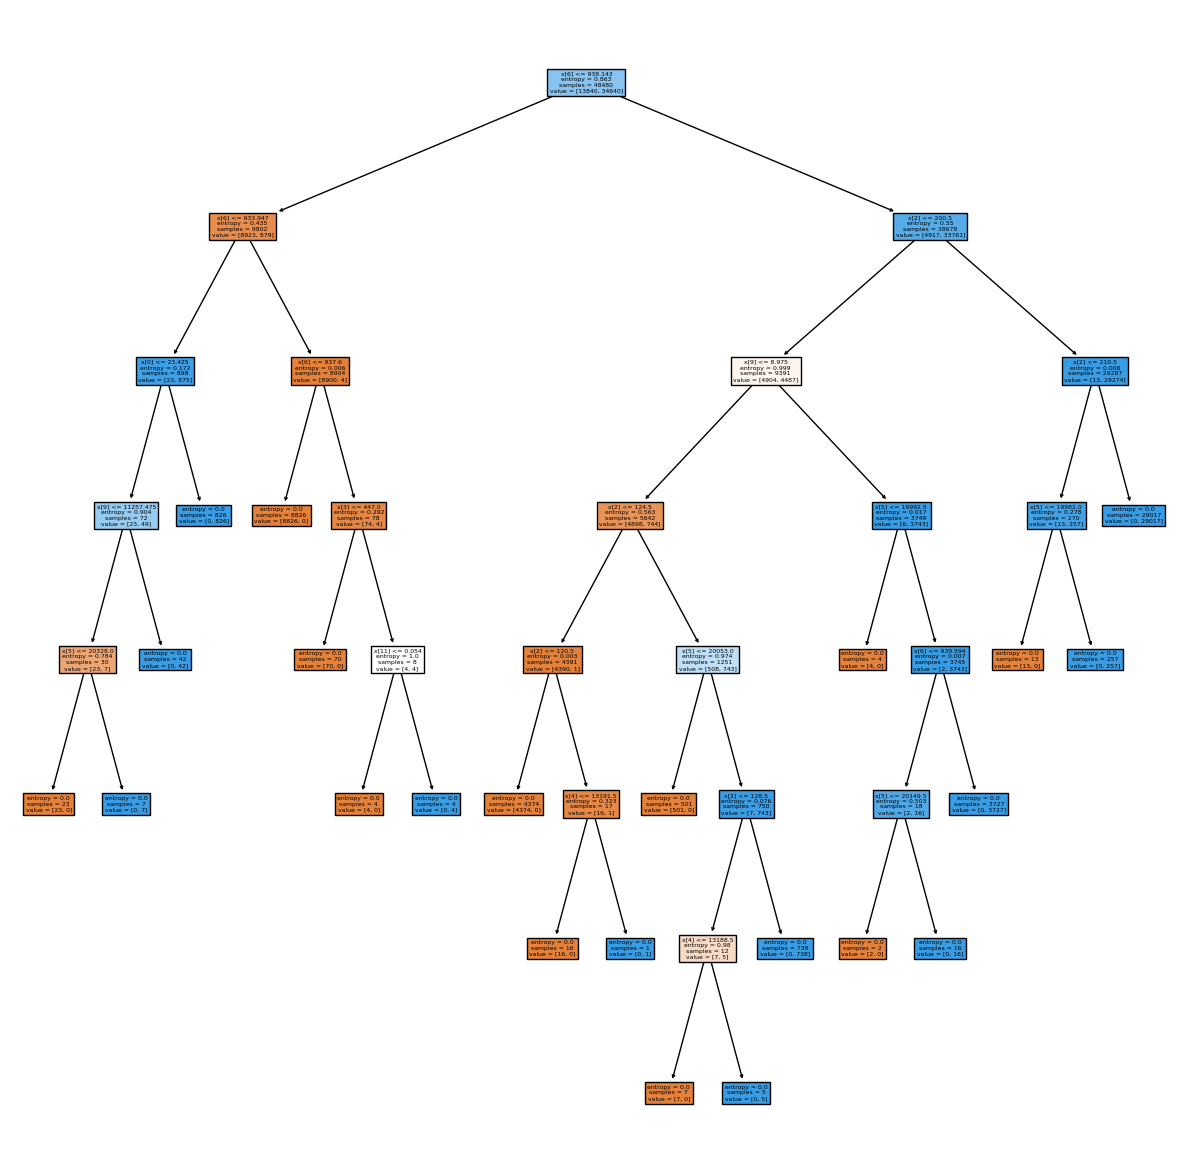

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
plot_tree(dtc_model.best_estimator_, filled=True, impurity=True) 

plt.savefig('figures/plot_tree-DTS.png')

In [51]:
dtreeviz.model

<function dtreeviz.trees.model(model, X_train, y_train, tree_index: int = None, feature_names: List[str] = None, target_name: str = None, class_names: (typing.List[str], typing.Mapping[int, str]) = None) -> dtreeviz.trees.DTreeVizAPI>

In [59]:
import graphviz
dot_data = tree.export_graphviz(dtc_model.best_estimator_, out_file=None,
                              feature_names=[i for i in X_train_clf.columns],
                              class_names=['No Alarm', 'Yes Alarm'],
                              filled=True, rounded=True,
                              special_characters=True)
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [53]:
import dtreeviz

image_est = dtreeviz.model(dtc_model.best_estimator_,
               X_train=X_train_clf,
               y_train=y_train_clf,
               target_name='class',
               feature_names=[i for i in X_train_clf.columns],
               class_names=['No Alarm', 'Yes Alarm'])
image_est.view()
image_est.save('dtreeviz.svg')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\seito\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\seito\AppData\Local\Temp\ipykernel_10584\499263122.py", line 9, in <module>
    image_est.view()
  File "c:\Users\seito\AppData\Local\Programs\Python\Python311\Lib\site-packages\dtreeviz\trees.py", line 557, in view
    :param fancy:
                  
  File "c:\Users\seito\AppData\Local\Programs\Python\Python311\Lib\site-packages\dtreeviz\models\shadow_decision_tree.py", line 281, in get_split_node_heights
    overall_feature_range[1], nbins + 1)
    ^^^^^^^^^^^^^^
  File "c:\Users\seito\AppData\Local\Programs\Python\Python311\Lib\site-packages\dtreeviz\models\shadow_decision_tree.py", line 504, in samples
  File "c:\Users\seito\AppData\Local\Programs\Python\Python311\Lib\site-packages\dtreeviz\models\sklearn_decision_trees.py", line 55, in ge

### Оценка построенной модели (подробнее)

Проверка переобучения и недообучения

In [23]:
print('Training set score: {:.4f}'.format(dtc_model.score(X_train_clf, y_train_clf)))
print('Test set score: {:.4f}'.format(dtc_model.score(X_test_clf, y_test_clf)))

Training set score: 1.0000
Test set score: 0.9999


Confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[3467    1]
 [   0 8653]]


Classification report

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test_clf, y_pred_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3468
           1       1.00      1.00      1.00      8653

    accuracy                           1.00     12121
   macro avg       1.00      1.00      1.00     12121
weighted avg       1.00      1.00      1.00     12121



## Decision Tree Regressor

In [83]:
df_reg=pd.read_csv("C:/Users/seito/Jupyter Notebook/data/dataset3_with_EDA")
df_reg

,Price,Area,Latitude,Longitude,Bedrooms,Bathrooms,Balcony,Neworold,Parking,Furnished_Status,Lift,Type_Of_Building
0,2240.0,629.0,19.032800,72.896357,2,2,0,1,0,0,0,0
1,3500.0,974.0,19.032800,72.896357,3,2,0,1,0,0,0,0
2,3170.0,968.0,19.085600,72.909277,3,3,0,1,0,0,0,0
3,1870.0,629.0,19.155756,72.846862,2,2,2,1,1,0,1,0
4,1350.0,1090.0,19.177555,72.849887,2,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6250,1950.0,810.0,19.138320,72.810020,2,2,0,0,0,1,0,0
6251,2200.0,1400.0,19.221920,72.854250,3,3,1,0,1,0,1,0
6252,2000.0,750.0,19.144320,72.824111,2,2,0,0,0,0,0,0
6253,1100.0,700.0,19.047201,72.872225,2,2,0,0,0,2,0,0


Уберем выбросы 😊

In [84]:
outlier = df_reg[['Price', 'Area']]

Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
# IQR-оценки
IQR = Q3-Q1
# Отфильтрованные данные, из которых удалены выбросы
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]

# Копирование индексов
index_list = list(data_filtered.index.values)
# Хранить данные без выбросов в отдельном DataFrame.
df_reg = df_reg[df_reg.index.isin(index_list)]
df_reg

,Price,Area,Latitude,Longitude,Bedrooms,Bathrooms,Balcony,Neworold,Parking,Furnished_Status,Lift,Type_Of_Building
0,2240.0,629.0,19.032800,72.896357,2,2,0,1,0,0,0,0
1,3500.0,974.0,19.032800,72.896357,3,2,0,1,0,0,0,0
2,3170.0,968.0,19.085600,72.909277,3,3,0,1,0,0,0,0
3,1870.0,629.0,19.155756,72.846862,2,2,2,1,1,0,1,0
4,1350.0,1090.0,19.177555,72.849887,2,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6250,1950.0,810.0,19.138320,72.810020,2,2,0,0,0,1,0,0
6251,2200.0,1400.0,19.221920,72.854250,3,3,1,0,1,0,1,0
6252,2000.0,750.0,19.144320,72.824111,2,2,0,0,0,0,0,0
6253,1100.0,700.0,19.047201,72.872225,2,2,0,0,0,2,0,0


In [85]:
y_reg = df_reg['Price']
X_reg = df_reg.drop(["Price"], axis=1)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=0)

X_train_reg.shape, y_train_reg.shape, X_test_reg.shape, y_test_reg.shape

((4432, 11), (4432,), (1109, 11), (1109,))

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

tree_param = [{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'max_depth': [i for i in range(1, 20)],
              'min_samples_leaf': [i for i in range(2, 20)]}]

dtr_model = GridSearchCV(DecisionTreeRegressor(),
                        tree_param,
                        cv=5,
                        n_jobs=-1,
                        verbose=True)


Fitting 5 folds for each of 1026 candidates, totalling 5130 fits


CPU times: total: 3.92 s
Wall time: 1min 31s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid=[{'criterion': ['squared_error', 'friedman_mse',
                                        'absolute_error'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19],
                          'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18,
                                               19]}],
             verbose=True)

In [ ]:
%%time
dtr_model.fit(X_train_reg, y_train_reg)

In [87]:
dtr_model.best_params_

{'criterion': 'absolute_error', 'max_depth': 11, 'min_samples_leaf': 17}

In [88]:
random = X_reg.sample(1, random_state=45)
print(random)

       Area   Latitude  Longitude  Bedrooms  Bathrooms  Balcony  Neworold  \
2168  718.0  19.167328  72.934784         2          2        0         0   

      Parking  Furnished_Status  Lift  Type_Of_Building  
2168        0                 0     0                 0  


In [89]:
print("Реальное значение:", y_reg.iloc[random.index[0]])
print("Предсказанное значение:", dtr_model.predict(random)[0])

Реальное значение: 2000.0
Предсказанное значение: 1500.0


In [90]:
dtr_model_best = DecisionTreeRegressor(**dtr_model.best_params_).fit(X_train_reg, y_train_reg)
y_pred_reg = dtr_model_best.predict(X_test_reg)

### Оценка качества

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("R^2:", r2_score(y_test_reg, y_pred_reg))

MAE: 413.9788097385032
MSE: 372767.71618575294
R^2: 0.6785268347154043


Не средние, а на разных выборках: 

In [97]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(dtr_model_best,
                            X_reg, y_reg,
                            cv=10,
                            scoring=["r2", ])
pd.DataFrame(data=cv_results)

,fit_time,score_time,test_r2
0,0.911738,0.002000,0.637893
1,0.854748,0.001010,0.719066
2,0.902944,0.002002,0.689622
3,0.878182,0.002008,0.655578
4,0.878438,0.000998,0.652838
5,0.897966,0.002015,0.669035
6,0.904955,0.001994,0.695647
7,0.906319,0.001998,0.739767
8,0.893040,0.001905,0.625910
9,0.901953,0.000992,0.603638


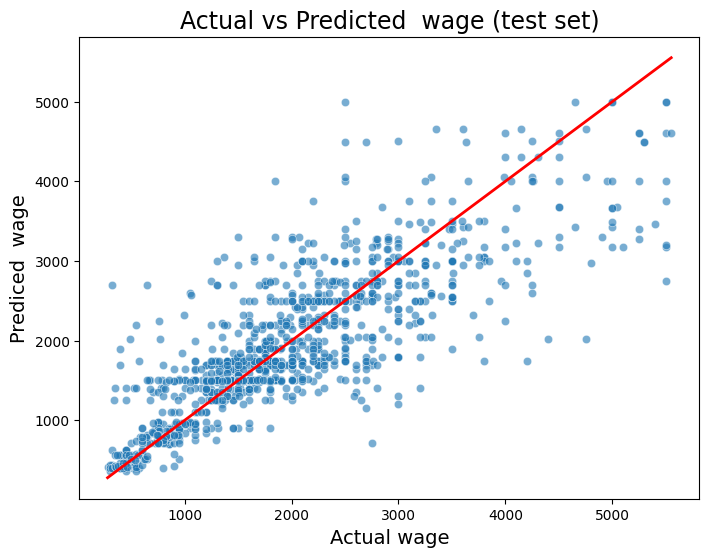

In [92]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.6)
sns.lineplot(x=y_test_reg, y=y_test_reg, color='red', linewidth=2)
plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

### Обрезка дерева с использованием метода обрезки по сложности затрат. Выбор $\alpha$ с помощью кросс-валидации.

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

path = DecisionTreeRegressor().cost_complexity_pruning_path(X_train_reg,y_train_reg)
ccp_alphas = path.ccp_alphas

In [102]:
len(ccp_alphas)

3310

In [108]:
RMSE_CV=[]
for alpha in ccp_alphas:
    MSE = -cross_val_score(estimator = DecisionTreeRegressor(**dtr_model.best_params_, random_state=1,ccp_alpha=alpha), X = X_train_reg, y = y_train_reg, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())                                                                                                                         

output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['RMSE_CV']=RMSE_CV

output.head()

In [ ]:
sns.lineplot(x='alpha', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs alpha")
plt.show()

In [ ]:
np.argmin(output['RMSE_CV'])

In [ ]:
optimal = output.iloc[np.argmin(output['RMSE_CV']),]
optimal

In [ ]:
optimal_alpha = output.iloc[np.argmin(output['RMSE_CV']),][0]
optimal_alpha

Refit DTs regressor с оптимальным значением alpha:

In [ ]:
dtr_model_best = DecisionTreeRegressor(**dtr_model.best_params_, ccp_alpha=optimal_alpha)
dtr_model_best.fit(X_train_reg, y_train_reg)
y_pred_reg = dtr_model_best.predict(X_test_reg)

### Визуализации

In [98]:
from sklearn.tree import export_graphviz, export_text

tree_rules = export_text(dtr_model_best, feature_names=list(X_reg.columns))
print(tree_rules)

|--- Latitude <= 19.23
|   |--- Bathrooms <= 2.50
|   |   |--- Latitude <= 19.15
|   |   |   |--- Longitude <= 72.86
|   |   |   |   |--- Latitude <= 19.07
|   |   |   |   |   |--- Area <= 1153.50
|   |   |   |   |   |   |--- Area <= 756.50
|   |   |   |   |   |   |   |--- Latitude <= 19.04
|   |   |   |   |   |   |   |   |--- Area <= 673.50
|   |   |   |   |   |   |   |   |   |--- value: [2425.00]
|   |   |   |   |   |   |   |   |--- Area >  673.50
|   |   |   |   |   |   |   |   |   |--- value: [2050.00]
|   |   |   |   |   |   |   |--- Latitude >  19.04
|   |   |   |   |   |   |   |   |--- value: [2975.00]
|   |   |   |   |   |   |--- Area >  756.50
|   |   |   |   |   |   |   |--- Longitude <= 72.82
|   |   |   |   |   |   |   |   |--- value: [4300.00]
|   |   |   |   |   |   |   |--- Longitude >  72.82
|   |   |   |   |   |   |   |   |--- Latitude <= 18.96
|   |   |   |   |   |   |   |   |   |--- value: [2025.00]
|   |   |   |   |   |   |   |   |--- Latitude >  18.96
|   |   |   |

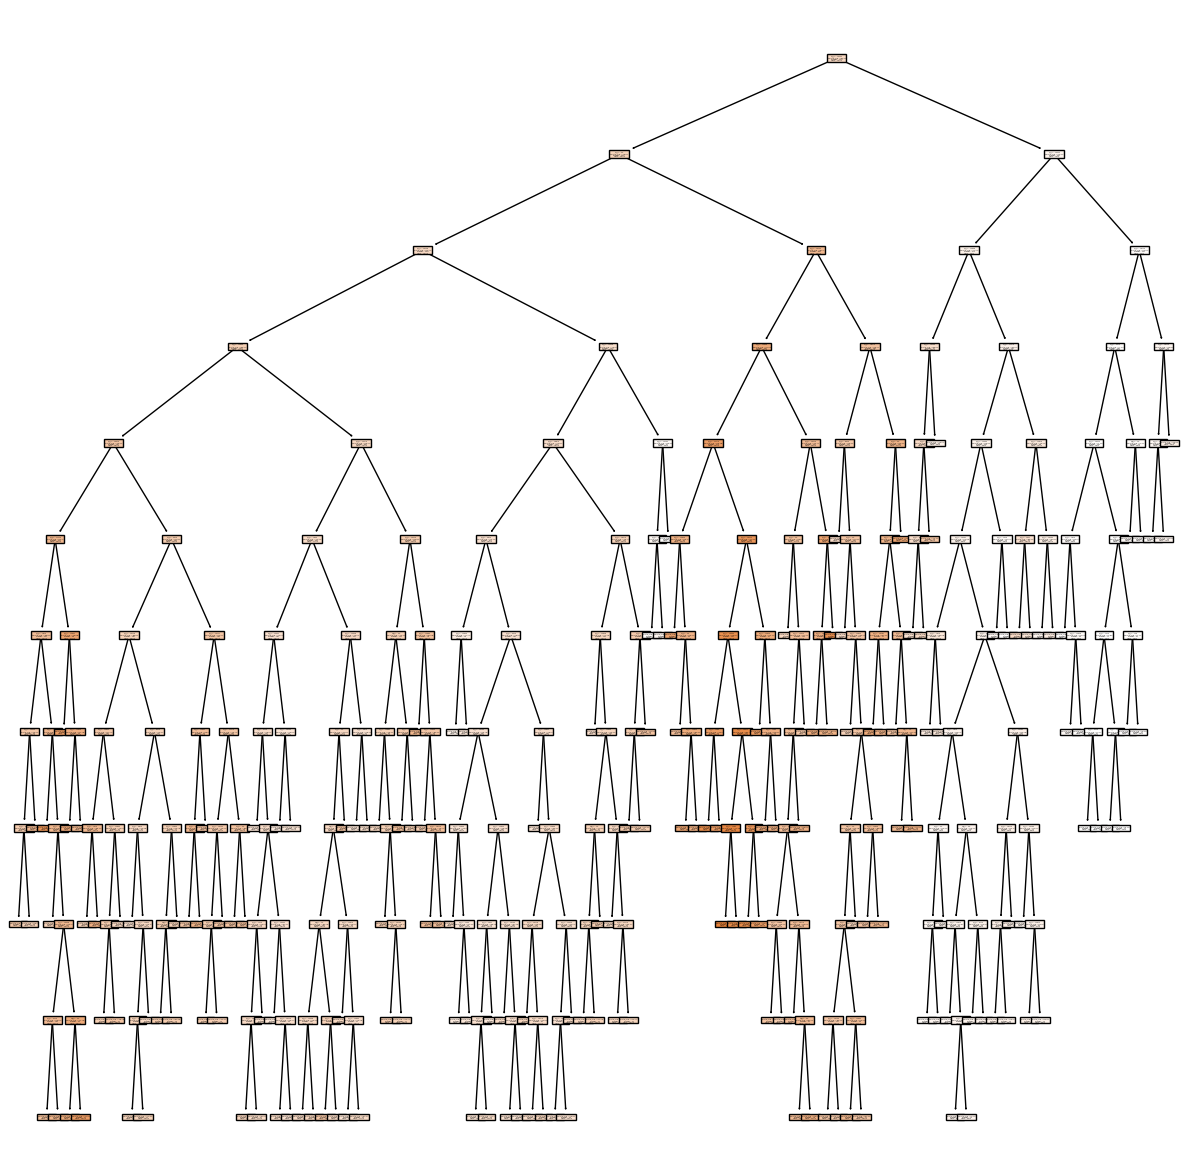

In [99]:
plt.figure(figsize=(15,15))
plot_tree(dtr_model_best, filled=True, impurity=True) 

plt.savefig('figures/plot_tree-DTR.png')

## CART